In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
testImg = cv2.imread("./images/1b2w.jpg")

In [11]:
def openCamera(source):
    
    cap = cv2.VideoCapture(source)
    if cap.isOpened() == False:
        print("something isnt working: can't capture video")
    
    cv2.namedWindow("what camera is seeing", cv2.WINDOW_NORMAL)
    cv2.resizeWindow("what camera is seeing", (800, 800))
    
    while cap.isOpened():
        
        ret, frame = cap.read()
        
        frame = imagePreProcessing(frame)
#         frame = imageEdges(frame)
        frame = contours(frame)
        cv2.imshow("what camera is seeing", frame)
        
        k = cv2.waitKey(1) & 0xFF
        if k == ord("q"):
            break
        elif k == ord("w"):
            cv2.imwrite("./images/outpuImg.jpg", frame)
            
#         if cv2.waitKey(1) & 0xFF == ord("w"):
#             cv2.imwrite("./images/outpuImg.jpg", frame)
#             continue
#         elif cv2.waitKey(1) & 0xFF == 27:
#             break
            
    cap.release()
    cv2.destroyAllWindows()

In [6]:
def imagePreProcessing(img):
    grayImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)            

    blurredGray = cv2.medianBlur(grayImg, 25)
    
    return blurredGray

In [7]:
def imageEdges(img):
    grayMedian = np.median(img)
    lower = int(max(0, 0.7*grayMedian))
    higher = int(min(255, 1.3*grayMedian))
    
    edges = cv2.Canny(image=img, threshold1=lower , threshold2=higher)
#     edges = cv2.Canny(image=grayImg, threshold1=100, threshold2=150)

    return edges

In [8]:
def contours(img):
    mockImg = np.zeros(img.shape)
    contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for i in range(len(contours)):
        cv2.drawContours(mockImg, contours, i, 255, -1)
        
    return mockImg

In [9]:
def watershed(img):
    pass

In [12]:
openCamera(2)

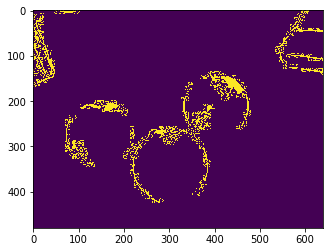

In [21]:
img = imageProcessing(testImg) 
plt.imshow()
type(img)
contours = Contours(img) 
plt.imshow(contours)